## Decription of dataset

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/yuzu0230/DS4CS_final/main/data/spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Drop columns of unnamed: 2 ~ 4
df = df[['v1', 'v2']]
# Rename the columns
df.columns = ['target', 'message']
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Insight of dataset

In [ ]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
df['msg_len'] = df['message'].apply(len)
df.head()

<ipython-input-6-c0f49dff1cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_len'] = df['message'].apply(len)


,target,message,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


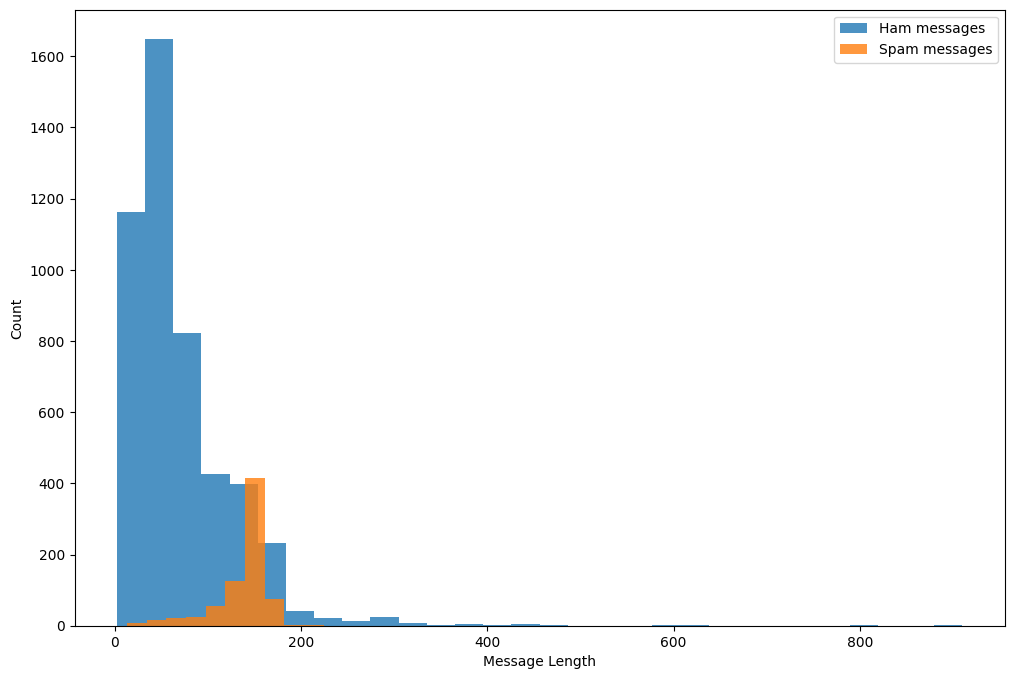

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

df[df['target'] == 'ham']['msg_len'].plot(bins=30, kind='hist', label='Ham messages', alpha=0.8)
df[df['target'] == 'spam']['msg_len'].plot(kind='hist', label='Spam messages', alpha=0.8)
plt.legend()
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()

In [ ]:
df[df['msg_len'] > 400].count()

target     17
message    17
msg_len    17
dtype: int64

In [ ]:
# Drop the outliers
df = df[df['msg_len'] < 400]
df.shape

(5555, 3)

## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# The LabelEncoder will transform the categorical strings ('ham', 'spam') into integers (0, 1).
df['target_encoded'] = encoder.fit_transform(df['target'])
df.head()

,target,message,msg_len,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()\

# Define a function to clean up the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'[!@#$%^&*()_+=\[{\]};:<>|./?,-]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords from the text
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the words in the text to their base form
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    text = text.strip()
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['msg_clean'] = df['message'].apply(clean_text)
df.head()

,target,message,msg_len,target_encoded,msg_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah think go usf life around though


## Modeling

### Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['msg_clean'], df['target_encoded'], test_size=0.2, random_state=66)

In [ ]:
from sklearn.svm import SVC

# Use TF-IDF Vectorizer for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions and evaluate the model
X_test_tfidf = tfidf.transform(X_test)
predictions = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9882988298829883


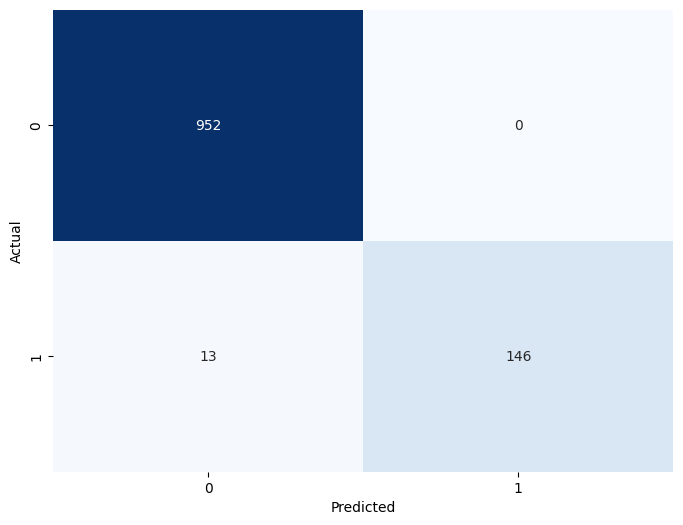

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Make predictions and evaluate the model
predictions = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9648964896489649


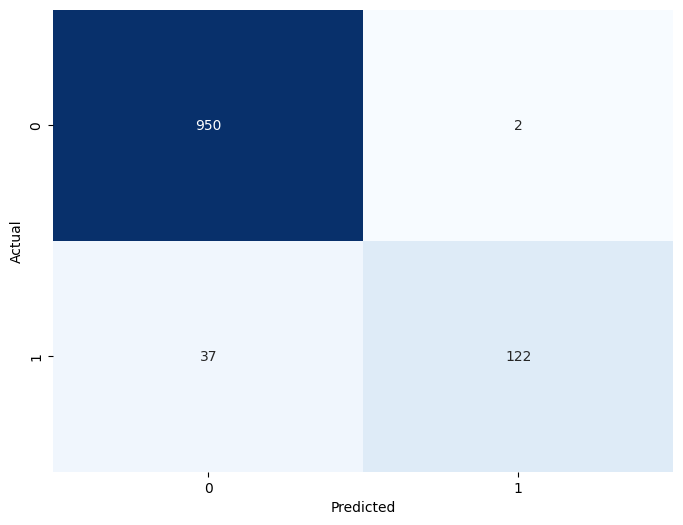

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
!pip install transformers tensorflow

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the BERT model with a classification head
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def encode_text(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors='tf')

# Encode data
encoded_data = encode_text(X_train.tolist())

In [ ]:
# Create a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    {key: encoded_data[key] for key in ['input_ids', 'attention_mask']},
    y_train.tolist()
))

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(10000).batch(32)

In [ ]:
# Set training arguments
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=3)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
139/139 [==============================] - 364s 2s/step - loss: 0.0921 - accuracy: 0.9730
Epoch 2/3
139/139 [==============================] - 299s 2s/step - loss: 0.0353 - accuracy: 0.9910
Epoch 3/3
139/139 [==============================] - 296s 2s/step - loss: 0.0208 - accuracy: 0.9939


In [ ]:
encoded_data = encode_text(X_test.tolist())

# Create a test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((
    {key: encoded_data[key] for key in ['input_ids', 'attention_mask']},
    y_test
))

test_dataset = test_dataset.batch(32)

In [ ]:
import numpy as np

predictions = model.predict(test_dataset)

predictions = np.argmax(predictions.logits, axis=1)
print("Accuracy:", accuracy_score(y_test, predictions))

35/35 [==============================] - 36s 799ms/step
Accuracy: 0.990999099909991


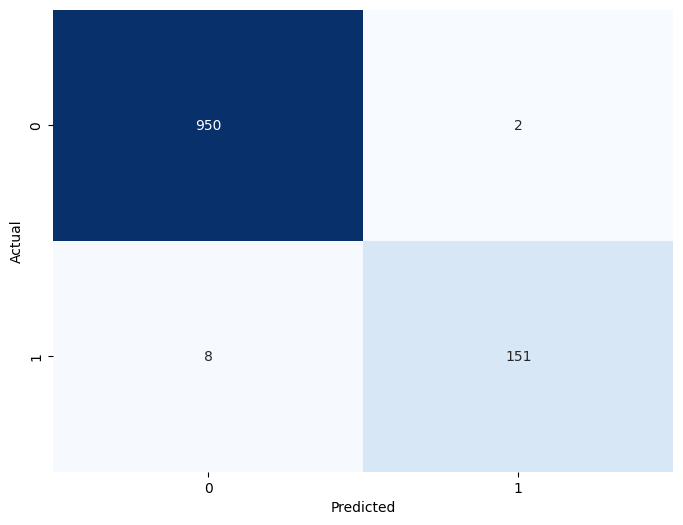

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()